In [1]:
import tensorflow as tf

In [2]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


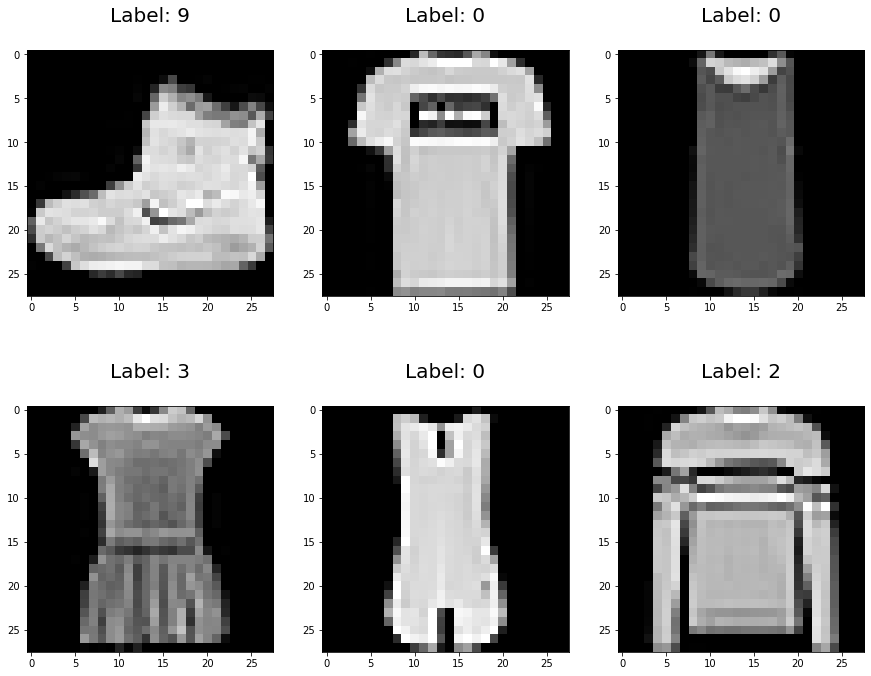

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

plt.figure(figsize=(15, 12))
for index, (image, label) in enumerate(zip(x_train[0:6], y_train[0:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i\n' % label, fontsize=20)

In [25]:
x_train_small, x_test_1, y_train_small, y_test_1 = train_test_split(x_train, y_train, train_size=3000, random_state=0)
print(x_train_small.shape)
print(y_train_small.shape)

x_train_1, x_test_small, y_train_1, y_test_small = train_test_split(x_test, y_test, test_size=1000, random_state=0)
print(x_test_small.shape)
print(y_test_small.shape)

x_train_small = x_train_small.reshape(3000,-1)
print(x_train_small.shape)

x_test_small = x_test_small.reshape(1000,-1)
print(x_test_small.shape)


(3000, 28, 28)
(3000,)
(1000, 28, 28)
(1000,)
(3000, 784)
(1000, 784)


In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_small, y_train_small)
knn_result = model.predict(x_test_small)

In [27]:
print('KNN Result:\n')
print(classification_report(y_test_small, knn_result))
print(metrics.confusion_matrix(y_test_small, knn_result))

KNN Result:

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        91
           1       0.91      0.96      0.93        91
           2       0.57      0.78      0.66        91
           3       0.92      0.82      0.87       112
           4       0.75      0.60      0.66        99
           5       0.96      0.61      0.74       107
           6       0.49      0.43      0.46        99
           7       0.77      0.89      0.83       102
           8       0.96      0.82      0.89        95
           9       0.82      0.96      0.89       113

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.76      1000
weighted avg       0.78      0.77      0.76      1000

[[ 71   3   2   1   1   0  12   0   1   0]
 [  0  87   1   1   0   0   2   0   0   0]
 [  2   0  71   0  11   0   6   0   1   0]
 [  6   3   5  92   3   0   3   0   0   0]
 [  0   2  19   4  59   0  15   0   0   0]
 [  2   0   1

In [15]:
model = SGDClassifier(max_iter=250)
model.fit(x_train_small, y_train_small)
sgd_result = model.predict(x_test_small)

In [16]:
print('SGD Result\n')
print(classification_report(y_test_small, sgd_result))
print(metrics.confusion_matrix(y_test_small, sgd_result))

SGD Result

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        91
           1       0.98      0.92      0.95        91
           2       0.52      0.86      0.65        91
           3       0.93      0.79      0.86       112
           4       0.76      0.47      0.58        99
           5       0.94      0.75      0.83       107
           6       0.66      0.37      0.48        99
           7       0.89      0.85      0.87       102
           8       0.86      0.92      0.89        95
           9       0.82      0.94      0.88       113

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.77      1000
weighted avg       0.80      0.78      0.77      1000

[[ 84   0   2   2   0   0   3   0   0   0]
 [  4  84   2   1   0   0   0   0   0   0]
 [  3   0  78   0   7   0   1   0   2   0]
 [ 12   0   5  89   1   1   2   0   1   1]
 [  1   1  37   1  47   0  12   0   0   0]
 [  0   1   2 

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train_small, y_train_small)
decision_tree_result = model.predict(x_test_small)

In [28]:
print('Decision Tree Result\n')
print(classification_report(y_test_small, decision_tree_result))
print(metrics.confusion_matrix(y_test_small, decision_tree_result))

Decision Tree Result

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        91
           1       0.87      0.85      0.86        91
           2       0.60      0.65      0.62        91
           3       0.70      0.68      0.69       112
           4       0.59      0.54      0.56        99
           5       0.81      0.78      0.79       107
           6       0.44      0.44      0.44        99
           7       0.81      0.78      0.80       102
           8       0.82      0.80      0.81        95
           9       0.79      0.84      0.82       113

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

[[67  2  0  5  1  1 14  0  1  0]
 [ 2 77  0  9  0  0  3  0  0  0]
 [ 1  1 59  1 15  1  9  0  4  0]
 [11  7  1 76  5  1  7  0  2  2]
 [ 4  0 19 10 53  0 13  0  0  0]
 [ 0  1  0  0  0 83  2 11  2  8]
 [15  1 17  4 13  0 4

By comparing with the scores presented in the Fashion-MNIST paper, my accuracy is lower because they use 60,000 to train and 10,000 to test and I only use 3000 for training and 1000 for test. Models would be overfitted with less samples. The distribution of images will be imbalanced too. For example, Accuracy for class 6 images is really low in the classification report. From numbers of support we can see the 6th number is the lowest. Besides, algorithms in the report are repeated 5 times by shuffling the data and my f1 score is just single result from one experiment.